# Librosa Audio Tools Tutorial

Description: Basic examples of audio analysis and processing with librosa. The goal is to make this as easy for others as possible, especially those more familiar with Matlab.
 
Based partly on the following:
- [librosa docs](https://librosa.org/doc/latest/index.html)


<a id='table_of_contents'></a>
# Table of contents 

1.0 [Audio Input](#input_sec)<br>
2.0 [Audio Analysis](#analysis_sec)<br>
3.0 [Audio Resampling](#resample_sec)<br>
4.0 [Other Colormaps](#other_cmaps)<br>

# Misc. Imports

In [1]:
import librosa
import librosa.display

from IPython.display import Audio

import matplotlib.pyplot as plt

import numpy as np



<a id='input_sec'></a>

# 1.0 Audio Input

[back to table of contents](#table_of_contents)

## 1.1 Audio Data Path

In [2]:
#from ESC-50 dataset
SAMPLE_WAV = "data/ESC50/waveforms/5-216216-A-13.wav" #crickets 

#from FSC22 dataset
#SAMPLE_WAV = "data/FSC22/waveforms/27_12766.wav" #great squirrel chirp then squawks


## 1.2 Load Audio Data


In [3]:
filename = SAMPLE_WAV
waveform, sample_rate = librosa.load(filename, sr=None)#sr=None keeps sample rate instead of resampling to default

print(f"waveform length: {waveform.shape[0]}")
print(f"sample_rate: {sample_rate}")


waveform length: 220500
sample_rate: 44100


<a id='analysis_sec'></a>

# 2.0 Audio Analysis

[back to table of contents](#table_of_contents)

Basic analysis includes
- playing sound file
- plotting amplitude vs time of audio waveform
- plotting frequency vs time spectrogram of audio waveform (i.e. a short-time fourier transform with sliding window)

## 2.1 Play Audio File

In [4]:
Audio(waveform, rate=sample_rate)

## 2.2 Plot Time-Amplitude of Audio Data

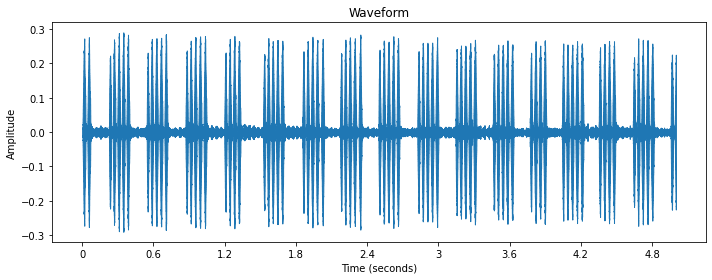

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## 2.3 Plot Time-Frequency Spectrogram

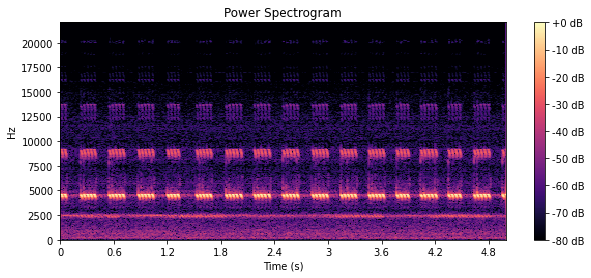

In [6]:
#compute spectrogram -- default time-frequency resolution
S = np.abs(librosa.stft(waveform)) #default: n_fft=2048,hop_length=None(512), win_length=None(2048), window='hann'
S_dB = librosa.amplitude_to_db(S,ref=np.max)

#make figure
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 4))
#img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='log', x_axis='time', ax=ax)
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax)
ax.set_title('Power Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


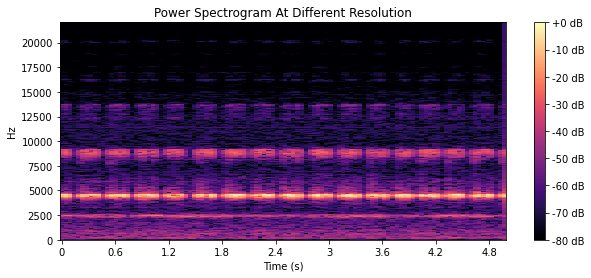

In [7]:
#different time-frequency resolution
NS=4 #number to scale ffts by: better frequency but worse time resolution
#NS=.25 #number to scale ffts by: worse frequency but better time resolution
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 

#compute spectrogram
S = np.abs(librosa.stft(waveform, n_fft=nfft, hop_length=hop_len))
S_dB = librosa.amplitude_to_db(S,ref=np.max)

#make figure
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 4))
#img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='log', x_axis='time', ax=ax)
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax, hop_length=hop_len)
ax.set_title('Power Spectrogram At Different Resolution')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

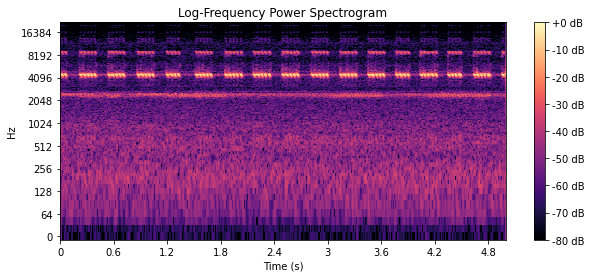

In [8]:
#log scale instead (should look similar to, but not exactly match, mel-spectrogram below)
NS=2 #number to scale ffts by: better frequency but worse time resolution
NS=.5 #number to scale ffts by: worse frequency but better time resolution
NS=1 #number to scale ffts by: 1=default
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 

#compute spectrogram
S = np.abs(librosa.stft(waveform, n_fft=nfft, hop_length=hop_len))
S_dB = librosa.amplitude_to_db(S,ref=np.max)

#make figure
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='log', x_axis='s', ax=ax, hop_length=hop_len)
ax.set_title('Log-Frequency Power Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

## 2.4 Plot Mel-Spectrogram

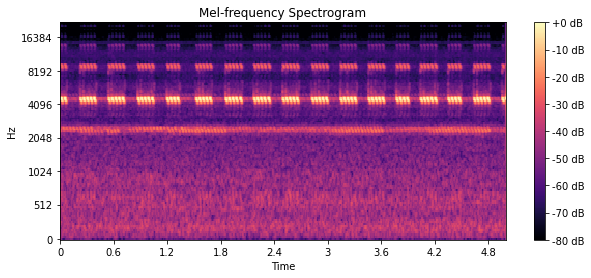

In [9]:
#compute mel spectrogram w/ default time-frequency resolution
S = np.abs(librosa.stft(waveform)) #spectra from before
MS = librosa.feature.melspectrogram(S=S**2, sr=sample_rate) #default: n_fft=2048, hop_length=512 

#MS = librosa.feature.melspectrogram(y=waveform, sr=sample_rate) #equivalent to two lines above

MS_dB = librosa.power_to_db(MS, ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram')
plt.show()

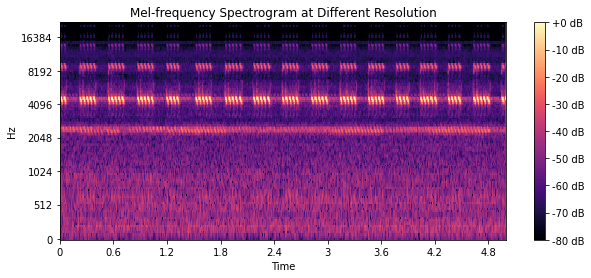

In [10]:
#different time-frequency resolution: 
#NS=2 #number to scale ffts by: better frequency but worse time resolution
NS=.5 #number to scale ffts by: worse frequency but better time resolution
#NS=1 #number to scale ffts by: 1=default
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 

#compute mel spectrogram
S = np.abs(librosa.stft( waveform, n_fft=nfft, hop_length=hop_len) ) #spectra from before
MS = librosa.feature.melspectrogram( S=S**2, sr=sample_rate, n_fft=nfft, hop_length=hop_len ) #default: n_fft=2048, hop_length=512 

#MS = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_fft=nfft, hop_length=hop_len) #equivalent to two lines above

MS_dB = librosa.power_to_db(MS, ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax, hop_length=hop_len)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram at Different Resolution')
plt.show()

<a id='resample_sec'></a>

# 3.0 Downsample to 16kHz (8kHz Nyquist)

[back to table of contents](#table_of_contents)


## 3.1 Downsampling

Downsample an audio waveform from one frequency to a lower one. We (usually) need to lowpass filter here to 
avoid aliasing. Default is to use Hann window filter (sinc_interp_hann) 

### Waveform and (re)sample rates

In [11]:
waveform, sample_rate = librosa.load(SAMPLE_WAV, sr=None)#sr=None keeps sample rate instead of resampling to default

print(f"waveform length: {waveform.shape[0]}")
print(f"sample_rate: {sample_rate}")

waveform length: 220500
sample_rate: 44100


In [12]:
#resample_rate = 44100
#resample_rate = 24000
resample_rate = 16000
#resample_rate = 8000
#resample_rate = 4000
#resample_rate = 500


resampled_waveform = librosa.resample(waveform, orig_sr=sample_rate, target_sr=resample_rate) #default: res_type='kaiser_best'

print(f"waveform length: {resampled_waveform.shape[0]}")
print(f"sample_rate: {sample_rate}, resample_rate: {resample_rate}")

waveform length: 80000
sample_rate: 44100, resample_rate: 16000


### 3.2 Check Results - Audio

In [13]:
print('original')
Audio(waveform, rate=sample_rate)


original


In [14]:
#check audio -- downsampled version should have less higher frequency content
print('resampled')
Audio(resampled_waveform, rate=resample_rate)#should have less high freq content than previous


resampled


### 3.3 Check Results - Waveform Plots

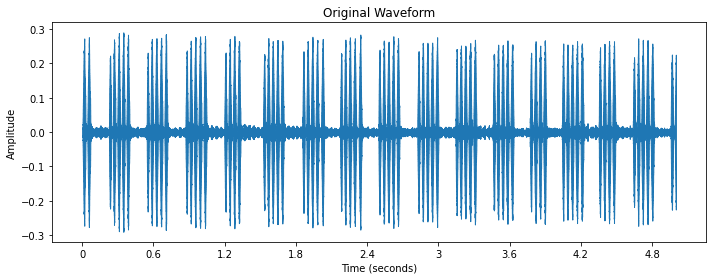

In [15]:
# check waveforms -- may look similar (just less points that can't easily be seen) or may look slightly smoother
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Original Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

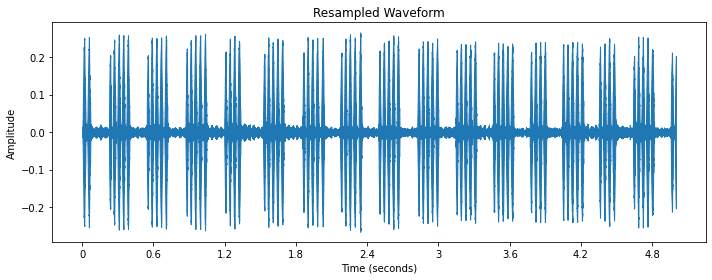

In [16]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(resampled_waveform, sr=resample_rate)
plt.title('Resampled Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

### 3.4 Check Results - Spectrograms

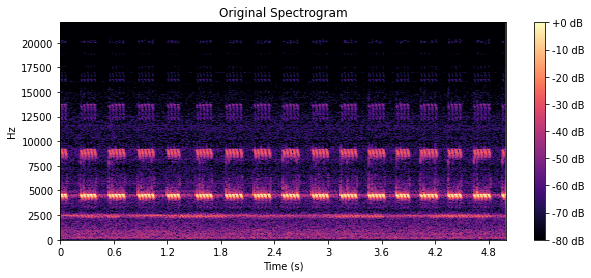

In [17]:
# check spectrograms -- everything below original Nyquist frequencey * 0.5( = 4kHz) should be similar 
# if aliasing is present, it won't look the same

#compute spectrogram
S = np.abs(librosa.stft(waveform)) #default: n_fft=2048,hop_length=None(n_fft/4),win_length=None(n_fft)
S_dB = librosa.amplitude_to_db(S,ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax)
ax.set_title('Original Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


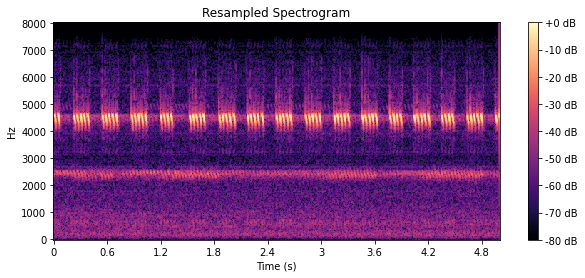

In [18]:
# check spectrograms -- everything below original Nyquist frequencey * 0.5( = 4kHz) should be similar 
# if aliasing is present, it won't look the same

#NS = round(resample_rate/sample_rate) #approximately same time-frequency resolution as original
#NS=2 #number to scale ffts by: better frequency but worse time resolution
NS=.25 #number to scale ffts by: worse frequency but better time resolution
#NS=1 #number to scale ffts by: 1=default
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 
win_len=round(2048*NS) #optional: default None makes it same as n_fft

#compute spectrogram
#S = np.abs(librosa.stft(resampled_waveform,n_fft=new_n_fft)) #default: n_fft=2048,hop_length=None,win_length=None, window='hann'
S = np.abs(librosa.stft(resampled_waveform,n_fft=nfft,hop_length=hop_len,win_length=win_len))
S_dB = librosa.amplitude_to_db(S,ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
#fig, ax = plt.subplots()
#img = librosa.display.specshow(S_dB, sr=resample_rate, y_axis='hz', x_axis='s', ax=ax, 
#                               n_fft=nfft,hop_length=hop_len,win_length=win_len,
#                               cmap='viridis') #match default torchaudio cmap

img = librosa.display.specshow(S_dB, sr=resample_rate, y_axis='hz', x_axis='s', ax=ax, 
                               n_fft=nfft,hop_length=hop_len,win_length=win_len)
ax.set_title('Resampled Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


### 3.5 Check Results - Mel-Spectrograms

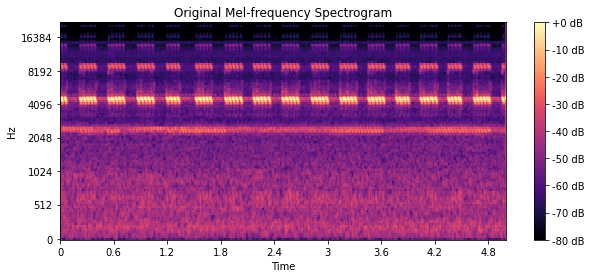

In [19]:
#plot mel spectrogram, mel filter center-frequency (in Hz) vs time (in seconds)

#original 1st

#compute mel spectrogram
S = np.abs(librosa.stft(waveform)) #spectra from before
MS = librosa.feature.melspectrogram(S=S**2, sr=sample_rate) #default: n_fft=2048, hop_length=512 

#MS = librosa.feature.melspectrogram(y=waveform, sr=sample_rate) #equivalent to two lines above

MS_dB = librosa.power_to_db(MS, ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Original Mel-frequency Spectrogram')
plt.show()

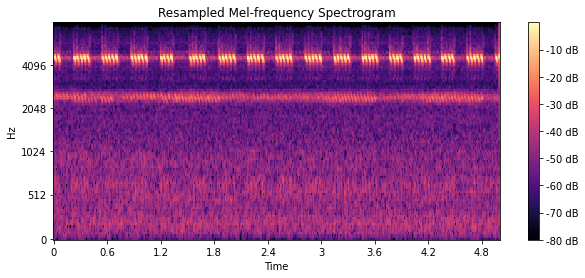

In [20]:
#resampled 2nd

#NS = round(resample_rate/sample_rate) #approximately same time-frequency resolution as original
#NS=2 #number to scale ffts by: better frequency but worse time resolution
NS=.25 #number to scale ffts by: worse frequency but better time resolution
#NS=1 #number to scale ffts by: 1=default
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 
win_len=round(2048*NS) #optional: default None makes it same as n_fft


#compute mel spectrogram 
MS = librosa.feature.melspectrogram(y=resampled_waveform, sr=resample_rate, 
                                    n_fft=nfft, hop_length=hop_len, win_length=win_len)

MS_dB = librosa.power_to_db(MS, ref=np.max)

#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=resample_rate, ax=ax, hop_length=hop_len)


fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Resampled Mel-frequency Spectrogram')
plt.show()

<a id='other_cmaps'></a>

# 4.0 Other Colormaps

[back to table of contents](#table_of_contents)


## 4.1  Librosa colormap default (for debug check)

In [21]:
#data for figures below

#NS=2 #number to scale ffts by: better frequency but worse time resolution
NS=.5 #number to scale ffts by: worse frequency but better time resolution
#NS=1 #number to scale ffts by: 1=default
nfft = round(2048*NS) #new fft length (also window size if None)
hop_len=round(512*NS) #note: need to specify hop_length if not 512 for specshow or x_axis labels can be wrong 
win_len=round(2048*NS) #optional: default None makes it same as n_fft

#compute spectrograms
S = np.abs(librosa.stft(waveform,n_fft=nfft,hop_length=hop_len,win_length=win_len)) #spectra from before
MS = librosa.feature.melspectrogram(S=S**2, sr=sample_rate,n_fft=nfft,hop_length=hop_len,win_length=win_len) #default: n_fft=2048, hop_length=512 

S_dB = librosa.amplitude_to_db(S,ref=np.max)
MS_dB = librosa.power_to_db(MS, ref=np.max)

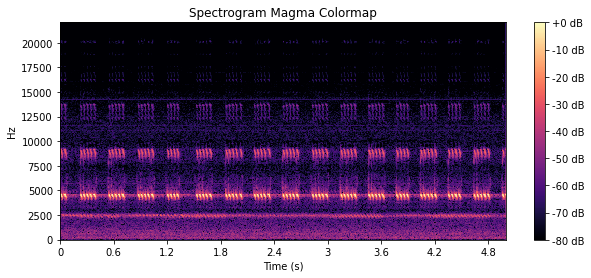

In [22]:
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
#fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax, 
                               n_fft=nfft,hop_length=hop_len,win_length=win_len,
                               cmap='magma') #match default librosa

ax.set_title('Spectrogram Magma Colormap')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


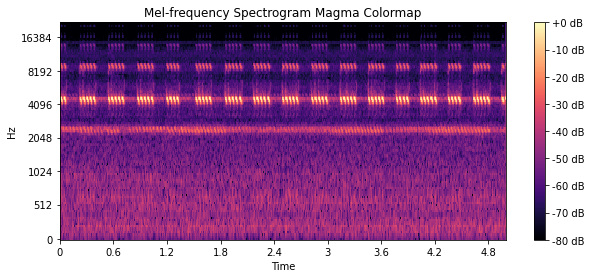

In [23]:
#match default torchaudio cmap viridis
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax, hop_length=hop_len,
                               cmap='magma') #match default librosa

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram Magma Colormap')
plt.show()

## 4.2: Torchaudio colormap default viridis

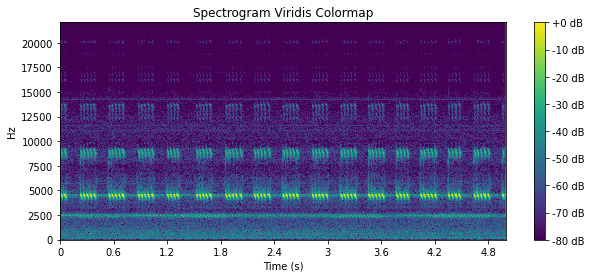

In [24]:
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
#fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax, 
                               n_fft=nfft,hop_length=hop_len,win_length=win_len,
                               cmap='viridis') #match default torchaudio cmap

ax.set_title('Spectrogram Viridis Colormap')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


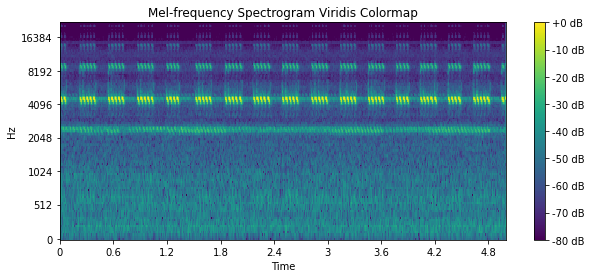

In [25]:
#match default torchaudio cmap viridis
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax, hop_length=hop_len,
                               cmap='viridis') #match default torchaudio cmap

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram Viridis Colormap')
plt.show()

## 4.3: Colormap twilight_shifted

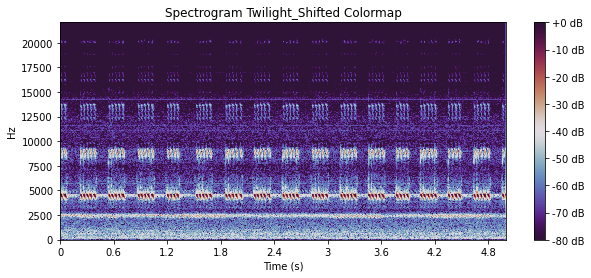

In [26]:
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
#fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, sr=sample_rate, y_axis='hz', x_axis='s', ax=ax, 
                               n_fft=nfft,hop_length=hop_len,win_length=win_len,
                               cmap='twilight_shifted') #use cmap I like

ax.set_title('Spectrogram Twilight_Shifted Colormap')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()


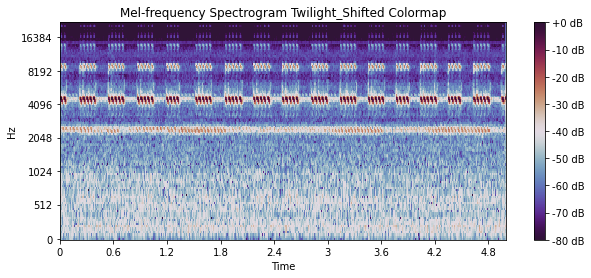

In [27]:
#make figure
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(MS_dB, x_axis='time',y_axis='mel', sr=sample_rate, ax=ax, hop_length=hop_len,
                               cmap='twilight_shifted') #use cmap I like

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram Twilight_Shifted Colormap')
plt.show()